# Resampling

In [20]:
import random
import math
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load HDF5 file with data
f = h5py.File('data.hdf5')
spectra = f['spectra']

## Wavelength range

In [5]:
# list of starting wavelens
wavelen_starts = list(map(
    lambda x: x[0, :][0], spectra.values()
))
# list of ending wavelens
wavelen_ends = list(map(
    lambda x: x[0, :][-1], spectra.values()
))

(array([  1.00000000e+00,   1.32040000e+04,   1.50000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.11000000e+02,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([ 6252.90917969,  6279.46098633,  6306.01279297,  6332.56459961,
         6359.11640625,  6385.66821289,  6412.22001953,  6438.77182617,
         6465.32363281,  6491.87543945,  6518.42724609]))

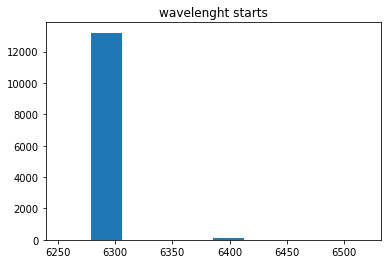

In [6]:
# show histogram
starts_n, starts_bins, _ = plt.hist(wavelen_starts)
plt.title('wavelenght starts')
starts_n, starts_bins

In [21]:
# derived from data above
start = math.ceil(starts_bins[-1])
start

6519

(array([  1.33340000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 6732.74316406,  6735.99277344,  6739.24238281,  6742.49199219,
         6745.74160156,  6748.99121094,  6752.24082031,  6755.49042969,
         6758.74003906,  6761.98964844,  6765.23925781]))

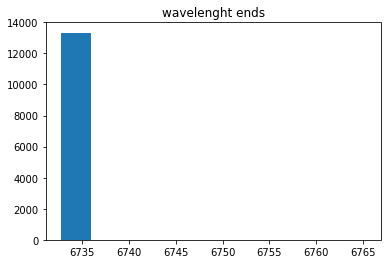

In [10]:
plt.title('wavelenght ends')
ends_n, ends_bins, _ = plt.hist(wavelen_ends)
ends_n, ends_bins

In [22]:
end = math.floor(ends_bins[0])
end

6732

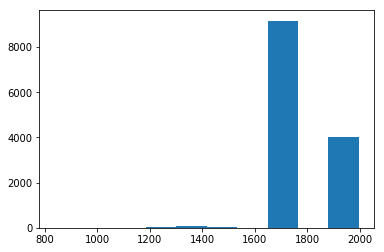

In [14]:
wavelen_lens = np.array([x[0, :].shape[0] for x in spectra.values()])
_ = plt.hist(wavelen_lens)

In [15]:
for waves, count in zip(*np.unique(wavelen_lens, return_counts=True)):
    print('{} waves: {} samples'.format(waves, count))

837 waves: 1 samples
1048 waves: 1 samples
1049 waves: 1 samples
1086 waves: 1 samples
1254 waves: 1 samples
1260 waves: 1 samples
1272 waves: 3 samples
1273 waves: 1 samples
1274 waves: 2 samples
1276 waves: 1 samples
1282 waves: 1 samples
1284 waves: 1 samples
1287 waves: 2 samples
1291 waves: 1 samples
1298 waves: 1 samples
1300 waves: 3 samples
1305 waves: 1 samples
1306 waves: 2 samples
1308 waves: 3 samples
1309 waves: 2 samples
1310 waves: 2 samples
1311 waves: 1 samples
1313 waves: 5 samples
1314 waves: 2 samples
1315 waves: 1 samples
1316 waves: 3 samples
1317 waves: 2 samples
1318 waves: 2 samples
1322 waves: 1 samples
1323 waves: 2 samples
1325 waves: 3 samples
1328 waves: 1 samples
1411 waves: 1 samples
1413 waves: 4 samples
1414 waves: 8 samples
1415 waves: 8 samples
1416 waves: 7 samples
1417 waves: 8 samples
1418 waves: 7 samples
1419 waves: 4 samples
1420 waves: 5 samples
1421 waves: 1 samples
1422 waves: 6 samples
1423 waves: 1 samples
1568 waves: 1 samples
1572 waves:

## Sample-rate Conversion

Sample-rate conversion it the process of changing the
sampling rate of discrete signal to get new representation
of the underlying continuous signal. The sampling rate
can be either increased (upsampling) or decreased
(decimation).

In [16]:
_, test_spectrum = random.choice(list(spectra.items()))
_, bar = random.choice(list(spectra.items()))

In [17]:
# sampled at different wavelens
test_spectrum, bar

(<HDF5 dataset "ri280051": shape (2, 1757), type "<f4">,
 <HDF5 dataset "og170042": shape (2, 1757), type "<f4">)

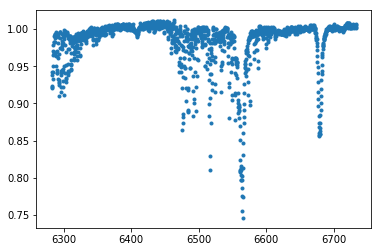

In [19]:
def plot_spectrum_with_points(spectrum):
    x = spectrum[0, :]
    y = spectrum[1, :]
    plt.plot(x, y, '.')

plot_spectrum_with_points(test_spectrum)

If resampled, upsampled and downsampled data are
plotted it can be seen then surely upsampling is the best.
Downsampling may lost some peaks. Therefore, upsampling
is choosen but smaller sample-rate can be choosen if
computation difficulties will be observed.

In [13]:
def resample_flux(new_wavelens, wavelens, flux):
    '''Resample spectrum defined by wavelens and flux
    to new_wavelens.'''
    return np.interp(new_wavelens, wavelens, flux)

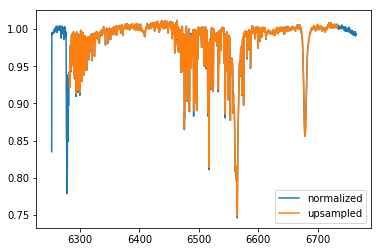

In [14]:
plt.plot(test_spectrum['wave'], test_spectrum['flux'], label='normalized')

# plot upsampled spectrum
upsampled_wavelens = np.linspace(start, end, 4000)
plt.plot(
    upsampled_wavelens,
    resample_flux(upsampled_wavelens, test_spectrum['wave'], test_spectrum['flux']),
    label='upsampled'
)
_ = plt.legend()

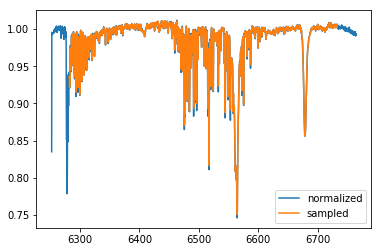

In [15]:
# plot normalized spectrum
plt.plot(test_spectrum['wave'], test_spectrum['flux'], label='normalized')

# define new wavelens whe number of wavelens is the same
# as in original spectrum
n_wavelens = test_spectrum['wave'].shape[0]
sampled_wavelens = np.linspace(start, end, n_wavelens)
# plot sampled spectrum
plt.plot(
    sampled_wavelens,
    resample_flux(sampled_wavelens, test_spectrum['wave'], test_spectrum['flux']),
    label='sampled'
)
_ = plt.legend()

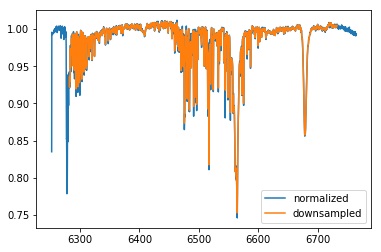

In [16]:
plt.plot(test_spectrum['wave'], test_spectrum['flux'], label='normalized')

# plot downsampled spectrum
downsampled_wavelens = np.linspace(start, end, 1000)
plt.plot(
    downsampled_wavelens,
    resample_flux(downsampled_wavelens, test_spectrum['wave'], test_spectrum['flux']),
    label='downsampled'
)
_ = plt.legend()

In [17]:
def are_wavelens_in_range(wavelen, start, end):
    return wavelen[0] < start and wavelen[-1] > end
    
are_wavelens_in_range(
    test_spectrum['wave'],
    start,
    end
)

True

In [18]:
idents = np.array([
    ident
    for ident, data in spectra.items()
    if are_wavelens_in_range(data['wave'], start, end)
        and ident != 'rd270026' # this is outlier
])
idents

array(['a201305230017', 'a201306060015', 'a201306060016', ..., 'we180033',
       'we200014', 'we200016'], 
      dtype='<U14')

In [19]:
if 'resampled/idents' in f:
    del f['resampled/idents']

dset = f.create_dataset(
    'resampled/idents',
    idents.shape,
    dtype=h5py.special_dtype(vlen=str)
)

dset[...] = idents

In [20]:
if 'resampled/wave' in f:
    del f['resampled/wave']

dset = f.create_dataset(
    'resampled/wave',
    upsampled_wavelens.shape,
    dtype=upsampled_wavelens.dtype
)

dset[...] = upsampled_wavelens

In [21]:
if 'resampled/fluxes' in f:
    del f['resampled/fluxes']

flux_dtype = test_spectrum['flux'].dtype

fluxes = f.create_dataset(
    'resampled/fluxes',
    (idents.shape[0], 4000),
    dtype=flux_dtype
)

for idx, ident in enumerate(idents):
    spectrum = spectra[ident]
    fluxes[idx, :] = resample_flux(upsampled_wavelens, spectrum['wave'], spectrum['flux']),

In [23]:
f.close()